In [512]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import graph_generator as gg
import graph_visualiser as gv
import importlib

In [513]:
importlib.reload(gg)
importlib.reload(gv)

<module 'graph_visualiser' from '/home/michal/PycharmProjects/algorithms/MOWNiT/lab2/graph_visualiser.py'>

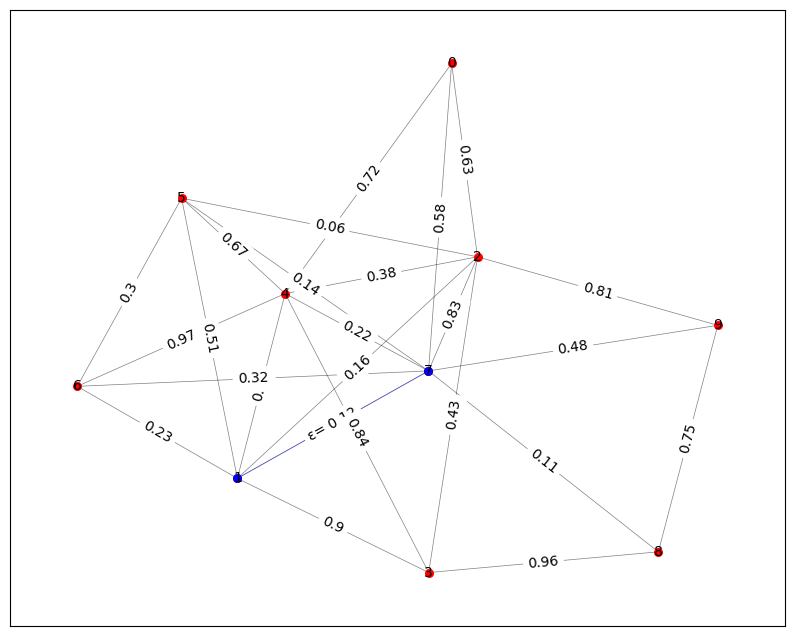

In [514]:
G, source, target, E = gg.generate_erdos_renyi(10, 0.5)
gv.draw_resistance(G, source, target)

In [515]:
def kirchoff(g, s, t):
    def add_sum_component(v1, v2):
        edge = g[v1][v2]['edge']
        if edge.voltage > 0:
            if v1 < v2:
                B[eq_no] -= edge.voltage
            else:
                B[eq_no] += edge.voltage
        else:
            if v1 < v2:
                A[eq_no][edge.index] += edge.resistance
            else:
                A[eq_no][edge.index] -= edge.resistance

    n = g.number_of_nodes()
    m = g.number_of_edges()

    cycle_basis = nx.cycle_basis(g)
    no_of_eq = n + len(cycle_basis)
    A = np.zeros((no_of_eq, m))
    B = np.zeros(no_of_eq)

    eq_no = 0
    for cycle in cycle_basis:
        for i in range(1, len(cycle)):
            add_sum_component(cycle[i-1], cycle[i])
        add_sum_component(cycle[-1], cycle[0])
        eq_no += 1

    for v in range(n):
        for neighbor in g.neighbors(v):
            edge = g[v][neighbor]['edge']
            if v < neighbor:
                A[eq_no][edge.index] += 1
            else:
                A[eq_no][edge.index] -= 1
        eq_no += 1
    transposed = A.T
    ans = np.linalg.solve(np.matmul(transposed, A), np.matmul(transposed, B))
    for a, b in g.edges:
        edge = g[a][b]['edge']
        edge.current = ans[edge.index]

    for v in range(n):
        suma = 0
        for neighbor in g.neighbors(v):
            if v < neighbor:
                suma += g[v][neighbor]['edge'].current
            else:
                suma -= g[v][neighbor]['edge'].current
        print(f"{v} : {suma}")


In [516]:
kirchoff(G, source, target)

0 : 0.0
1 : 0.0
2 : -7.632783294297951e-17
3 : -5.551115123125783e-17
4 : 8.326672684688674e-17
5 : -5.551115123125783e-17
6 : 2.7755575615628914e-17
7 : 1.734723475976807e-16
8 : -3.2959746043559335e-17
9 : -5.0306980803327406e-17


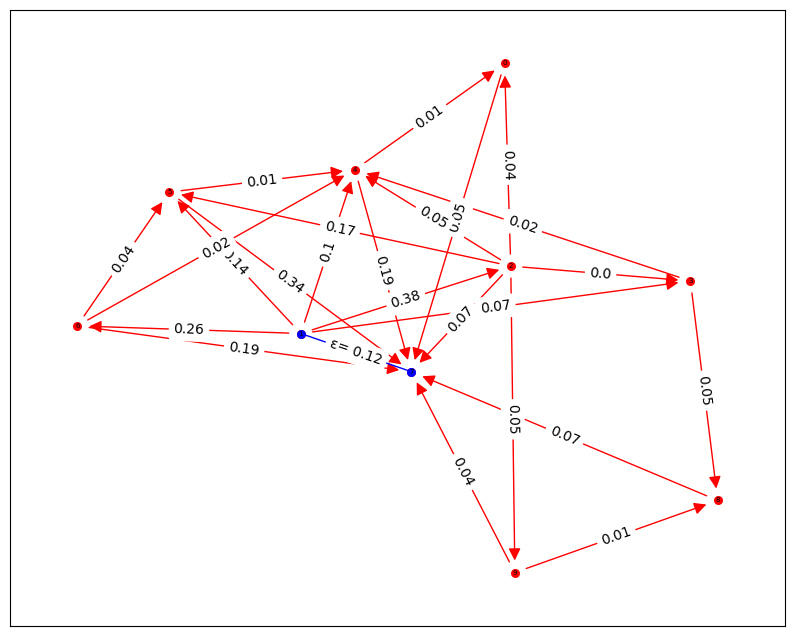

In [517]:
gv.draw_current(G, source, target)

In [518]:
def nodal_potentials(g, s, t):
    n = g.number_of_nodes()
    A = np.zeros((n, n))
    B = np.zeros(n)
    A[s][s] = 1
    B[s] = g[s][t]['edge'].voltage
    A[t][t] = 1
    B[t] = 0

    for v in range(n):
        if v != s and v != t:
            for neighbor in g.neighbors(v):
                edge = g[v][neighbor]['edge']
                A[v][v] += 1/edge.resistance
                A[v][neighbor] -= 1/edge.resistance

    potentials = np.linalg.solve(A, B)
    for a, b in g.edges:
        edge = g[a][b]['edge']
        if edge.resistance <= 0:
            print(a, b)
            continue
        if a < b:
            edge.current = (potentials[a] - potentials[b]) / edge.resistance
        else:
            edge.current = (potentials[b] - potentials[a]) / edge.resistance

    print(potentials)
    for v in range(n):
        suma = 0
        for neighbor in g.neighbors(v):
            if v < neighbor:
                suma += g[v][neighbor]['edge'].current
            else:
                suma -= g[v][neighbor]['edge'].current
        print(f"{v} : {suma}")


In [519]:
nodal_potentials(G, source, target)

1 7
[3.18495315e-02 1.20000000e-01 5.85444902e-02 5.74580567e-02
 4.08783568e-02 4.82453747e-02 6.12228048e-02 1.47471372e-18
 7.26935269e-03 1.76231961e-02]
0 : -1.3877787807814457e-17
1 : 1.2212453270876722e-15
2 : 6.245004513516506e-17
3 : -1.5959455978986625e-16
4 : -5.551115123125783e-17
5 : -1.1102230246251565e-16
6 : -1.6653345369377348e-16
7 : -7.216449660063518e-16
8 : 1.214306433183765e-17
9 : 1.5612511283791264e-17


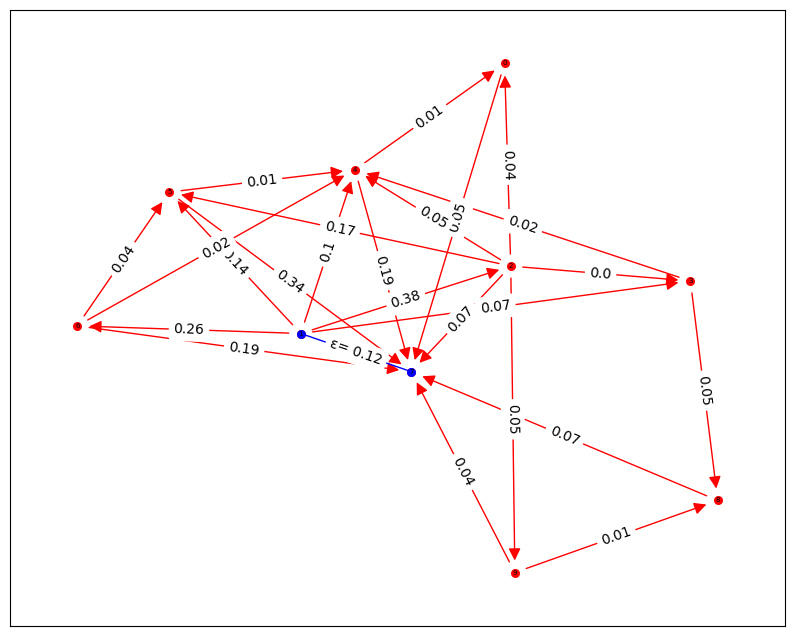

In [520]:
gv.draw_current(G, source, target)